# Ford GoBike System Data 2017

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


### What is the structure of your dataset?

There are 519700 rides on bike in the dataset with 13 features (ride_id,rideable_type,started_at,ended_at,start_station_name, start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual) 


### What is/are the main feature(s) of interest in your dataset?

I'm most interested to figure out what features can affect rides in our data like the month or type of riders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that "start_time" will have the strongest effect on this data , it will reavel which month people are intersted on renteting the bikes 

# Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


There is no misiing value in our data but we have some false type 

In [7]:
#convert the start and end time  from object to date time 
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

we will create a new column for the start time called start_month so we can analyze easliy 

In [9]:
df['start_month']=df['start_time'].dt.month
df.start_month=df.start_month.astype(int)

In [10]:
df.to_csv('2017-fordgobike-tripdata-cleaned.csv' , index = False)

## Univariate Exploration

**Q1:Which type of user is used the most?**

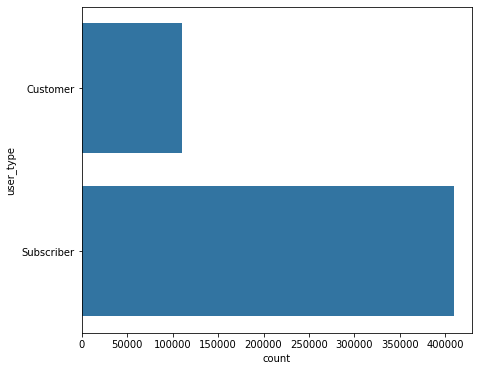

In [11]:
plt.figure(figsize = [7, 6])
base_color=sb.color_palette()[0]
sb.countplot(data=df,y='user_type',color=base_color);

**Like we see here the that the subscribers use bikes more than the customer**

**Q2:The time trips durations**

In [12]:
h=df['duration_sec'].max()
h

86369

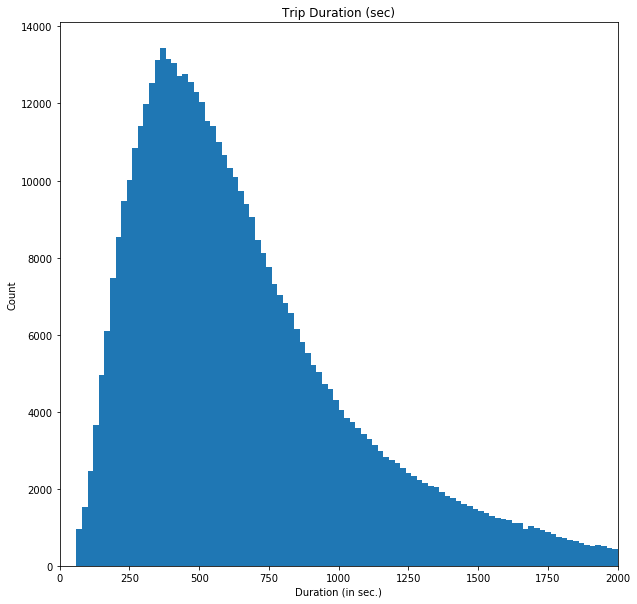

In [21]:
bins = np.arange(0, df['duration_sec'].max()+20, 20)
plt.figure(figsize=[10, 10])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim([0,2000]);
plt.xlabel('Duration (in sec.)')
plt.ylabel('Count')
plt.title("Trip Duration (sec)");

**from this visual we see that the majority of trip durations are between 250 and 1000  (4.16min and 16.6min)**

**Q3: People in which month they rent the bikes?**

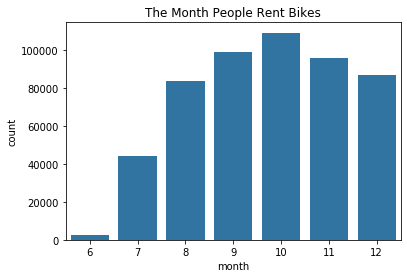

In [14]:
base_color=sb.color_palette()[0]
sb.countplot(data=df , x='start_month',color=base_color)
plt.title('The Month People Rent Bikes')
plt.xlabel('month');

**We see now the most rented month was October**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We prepared Questions to try and revel a lot of good information that can help understanding and the answers for these Questions were the subscirbers uses the bikes more than customers , also We find out that the majority of trip durations are between 4.16 and 16.6 mins , also the most rented bike month was October

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

On the cleaning phase i changed the start and end time from strings to datetime and creat a new colomun to helps us to analyze the data called start month

## Bivariate Exploration

### In this secetion we are invisting in the
### 1- The relationship between the user type and the duration trip
### 2- The relationship between the month and the user type 
### 3- the relationship between the month and the duration trip

*Q1: Which type of user is greater in term of bike trip duration* 

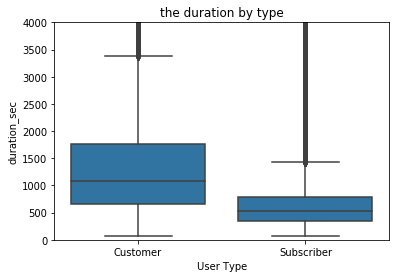

In [15]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec',
               color = base_color)
plt.ylim(0, 4000);
plt.xlabel('User Type');
plt.title('the duration by type');

We see now that customer is higher than subscriber in term of the time duration on the bike

*Q2:what month the subscriber and customer have the heighest among the other months*

Text(0.5, 1.0, 'The relationship between the month and the user type')

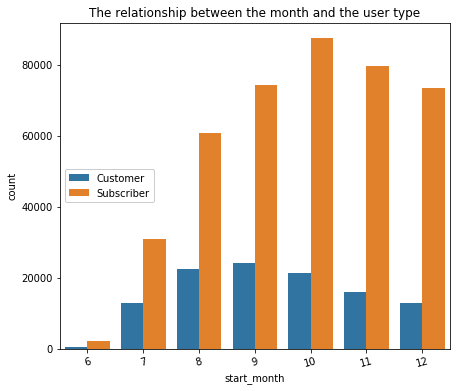

In [22]:
plt.figure(figsize = [7, 6])
ax = sb.countplot(data = df, x = 'start_month', hue = 'user_type')
ax.legend(loc = 6, framealpha = 1)
plt.xticks(rotation = 15)
plt.title("The relationship between the month and the user type")

We see that we find out a lot of information in this viusal 

1-the the highest month for the subscriber was on october and the lowest was in June

2-the the highest month for the customer was on september and the lowest was in july 

3-We see that  subsciber increase from june to october in decrease and the customer increase from june till july and decrease 

*Q3: Which month has the least duration?*

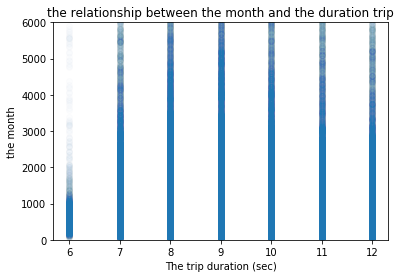

In [23]:
plt.scatter(data = df , x='start_month' , y='duration_sec' ,  alpha = 1/80)
plt.ylim(0, 6000);
plt.xlabel('The trip duration (sec)')
plt.ylabel('the month')
plt.title('the relationship between the month and the duration trip');

We see that the June has the least trip duration 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
we find out for both riders june was the lowest among the others, and for the subscribers we find out the that it October was the highest and for the customer was september

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes that the subscribers was less than the  customer in term of trip duration

## Multivariate Exploration

In this section we will see the relationship between three varibles the user type ,month and the trip duration

*Q1: what is the elationship between the user type trip duration and the month?*

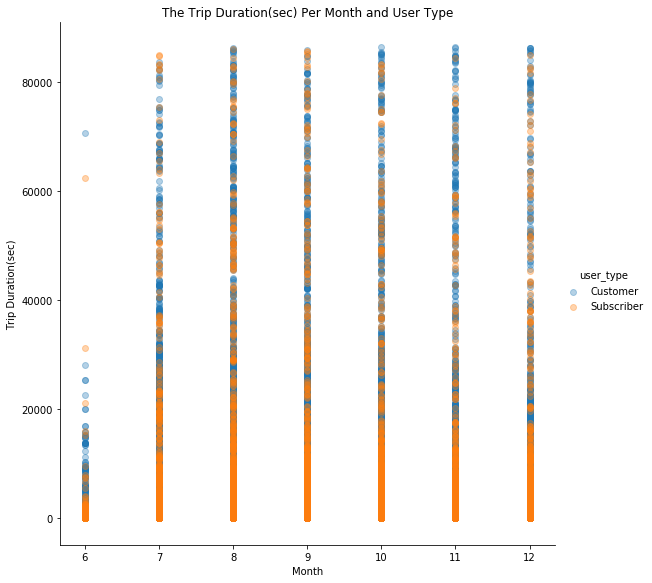

In [18]:
g = sb.FacetGrid(data =  df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_month','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(sec) Per Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(sec)');

We see here it's not clear so which type is is higher or lower time spent on bike

C:\Users\d7oom\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


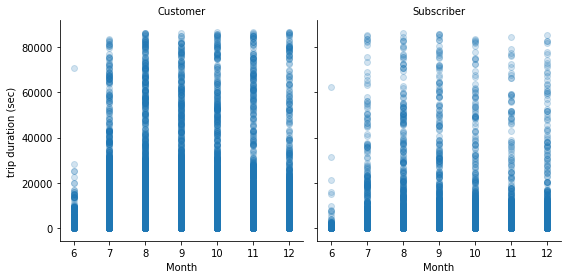

In [19]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 4,
                     col_wrap = 2)
g.map(sb.regplot, 'start_month', 'duration_sec', y_jitter = 0.04, fit_reg = False,
          scatter_kws = {'alpha' : 1/5})
g.set_ylabels('trip duration (sec)')
g.set_xlabels('Month')
g.set_titles('{col_name}');